In [ ]:
import os
RESULTS_FOLDER = "text_WebSight" 
list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

204

In [ ]:
%run utils/postprocessing.py --folder text_WebSight --suffix .txt

100%|██████████| 204/204 [00:01<00:00, 142.46it/s]


In [ ]:
%run utils/extract_screenshots --folder text_WebSight --webGenerator

css_folder_path:  /
Using Chrome binary at: /mnt/ffs24/home/seyeon/chrome-linux64/chrome


100%|██████████| 204/204 [04:14<00:00,  1.25s/it] 

Generated 204 PNG files in 254.3 seconds. Files are in /.


In [4]:
# NOTE: this was run from command line to use multiprocessing
%run utils/calculate_metrics --folder text_WebSight_110

Number of files: 102


  0%|          | 0/102 [00:00<?, ?it/s]/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_

   Avg Edit Distance = 633.392
             Avg Bleu Score = 0.671
Avg HTML Tree Edit Distance = 9.990
             Avg SSIM index = 0.836
/nExecution time: 386.73804450035095


In [ ]:
import pandas as pd
import os
import json

RESULTS_FOLDER = "text_WebSight"  

# Load all json files
all_json_files = [os.path.join(RESULTS_FOLDER, file) for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print(f"{file_path}: {data}") 
    dataframes.append(pd.DataFrame([data]))

df = pd.concat(dataframes, ignore_index=True)
print(df)

text_WebSight_110/00908.json: {'errors': ['/bin/sh: 1: tidy: not found'], 'len_pred': 2406, 'len_answer': 2616, 'max_len': 2616, 'bleu': 0.8689362638056076, 'ed': 461, 'n_ed': 0.19216340141725718, 'ssim_index': 0.409982640383988, 's_bleu': 0.8185255225029663, 'ted': 6.0, 'n_ted': 0.2608695652173913}
text_WebSight_110/00909.json: {'errors': ['/bin/sh: 1: tidy: not found'], 'len_pred': 3094, 'len_answer': 2430, 'max_len': 3094, 'bleu': 0.6889307690767911, 'ed': 1181, 'n_ed': 0.4085091663784158, 'ssim_index': 0.6099447851700837, 's_bleu': 0.7125909402301217, 'ted': 18.0, 'n_ted': 0.5142857142857142}
text_WebSight_110/00910.json: {'errors': ['/bin/sh: 1: tidy: not found'], 'len_pred': 1328, 'len_answer': 2209, 'max_len': 2209, 'bleu': 0.48313543225837774, 'ed': 905, 'n_ed': 0.46055979643765904, 'ssim_index': 0.9726137951021411, 's_bleu': 0.5412649341043201, 'ted': 13.0, 'n_ted': 0.52}
text_WebSight_110/00911.json: {'errors': ['/bin/sh: 1: tidy: not found'], 'len_pred': 1399, 'len_answer': 

In [7]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [8]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,similarity_index,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1486.000000,1560.480392,1655.970588,0.671376,633.392157,0.439119,0.835996,0.633195,9.990196,0.457561
std,484.562168,511.889757,533.001745,0.157902,299.969112,0.170566,0.270488,0.183211,5.879138,0.213275
min,655.000000,490.000000,655.000000,0.242360,48.000000,0.063915,0.000142,0.168370,0.000000,0.000000
25%,1105.500000,1209.000000,1315.500000,0.566107,421.250000,0.332879,0.843921,0.541837,5.000000,0.294665
50%,1513.000000,1562.500000,1629.500000,0.716141,625.000000,0.440221,0.974589,0.677513,10.000000,0.500000
75%,1782.000000,1833.500000,1931.500000,0.776346,849.750000,0.558907,0.988485,0.746369,13.000000,0.610507
max,3094.000000,3812.000000,3812.000000,0.957453,1775.000000,0.770510,0.999435,0.984283,28.000000,0.882353


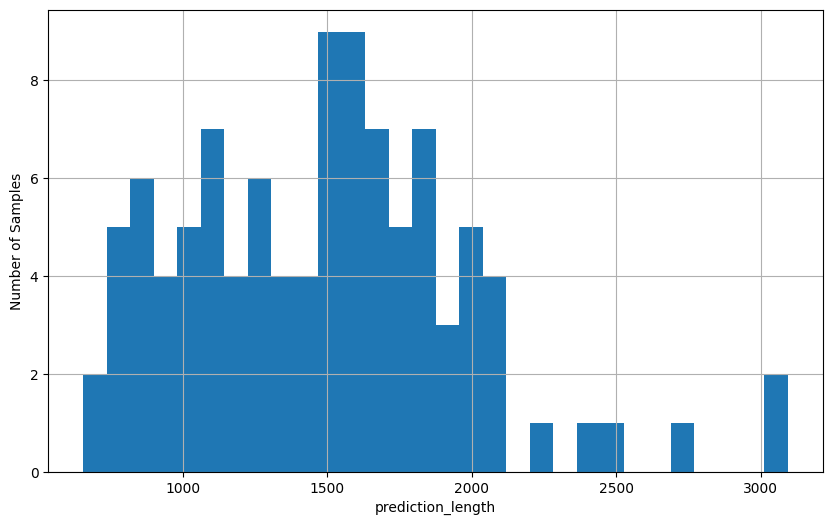

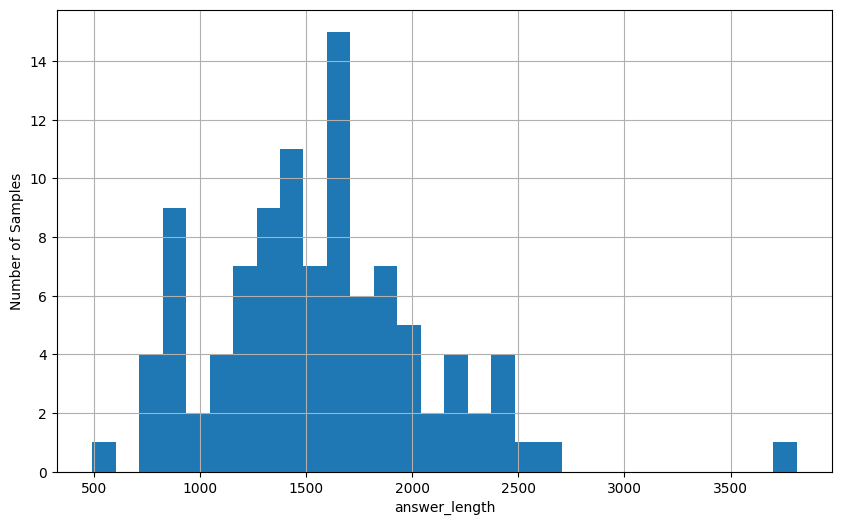

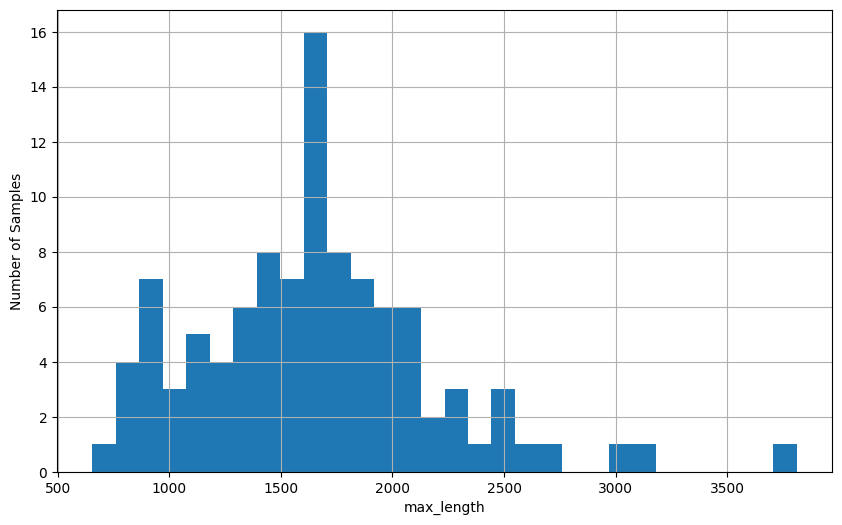

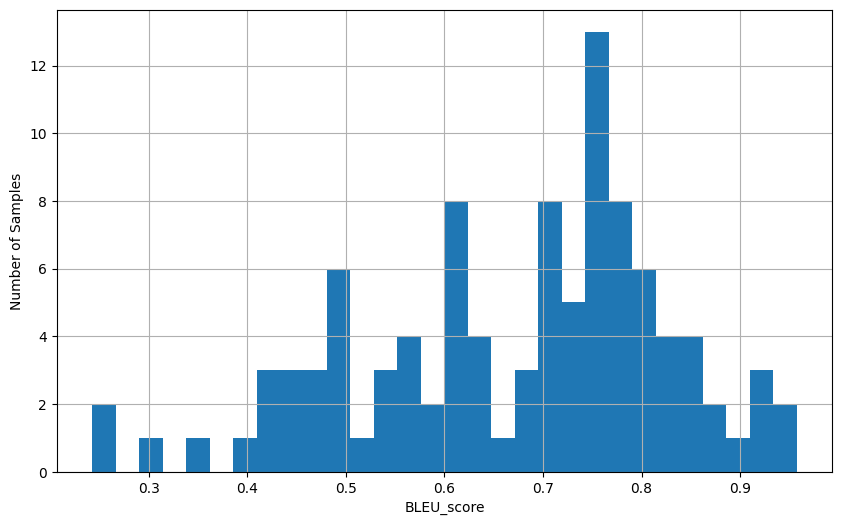

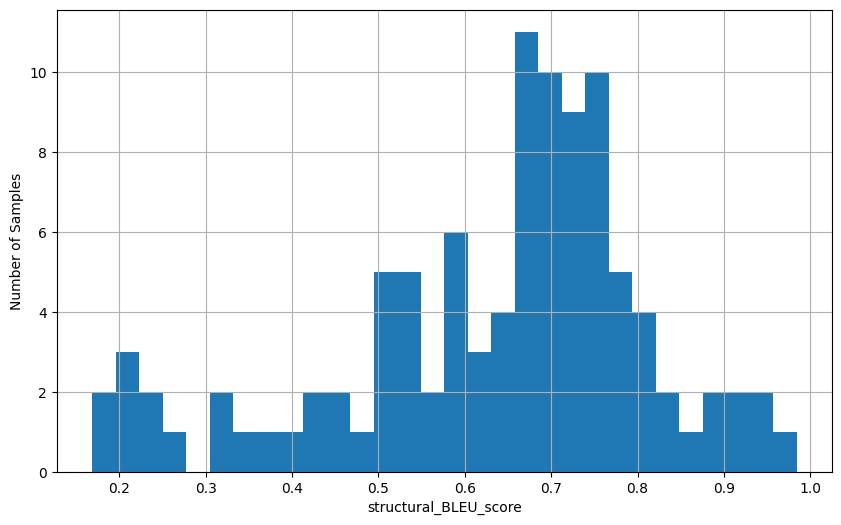

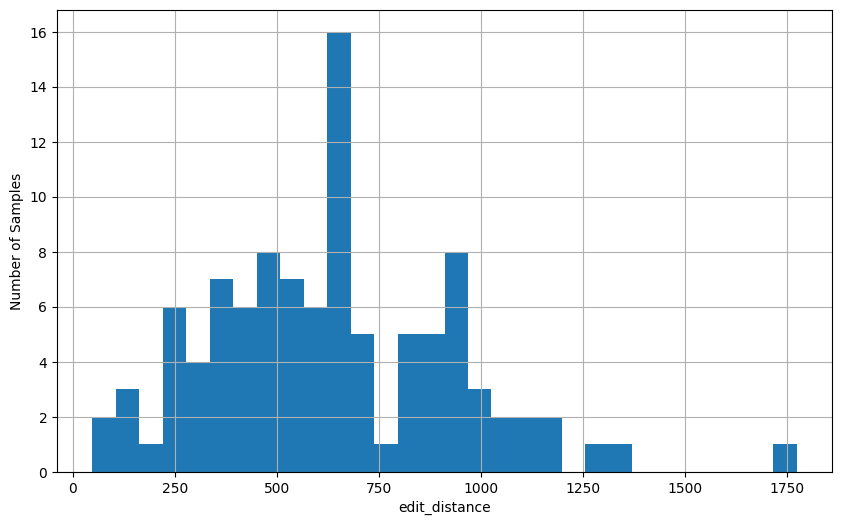

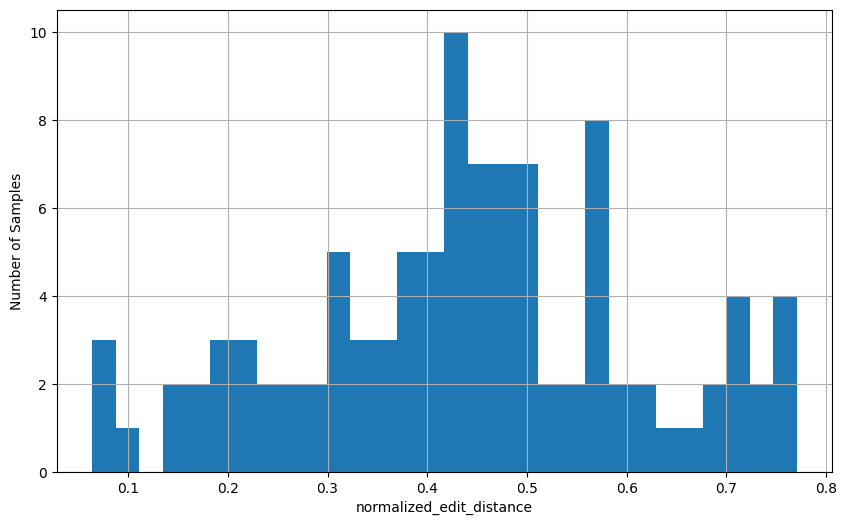

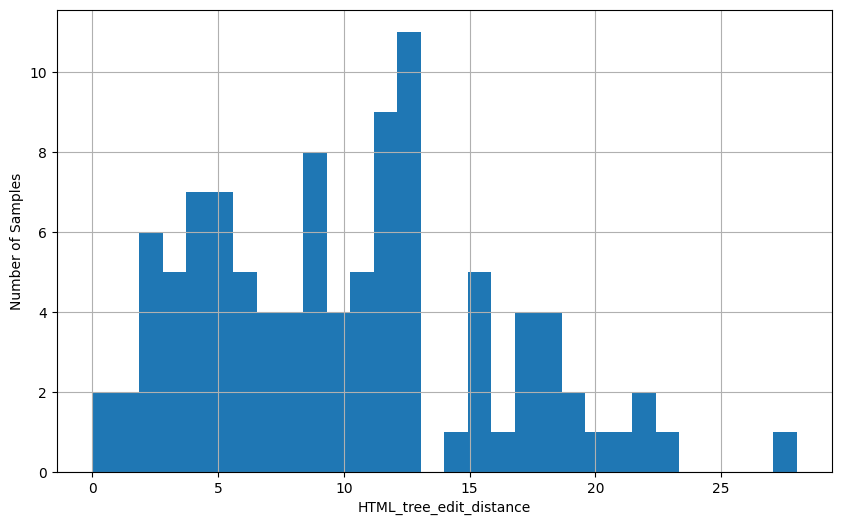

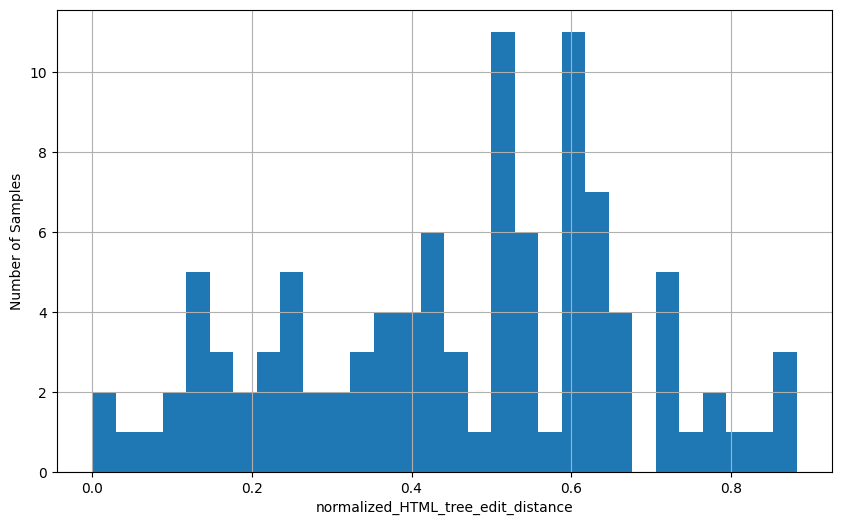

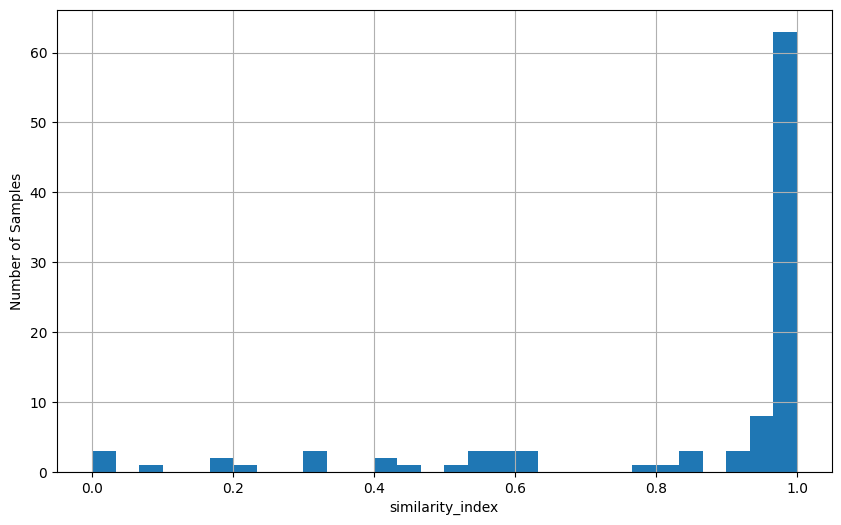

In [9]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


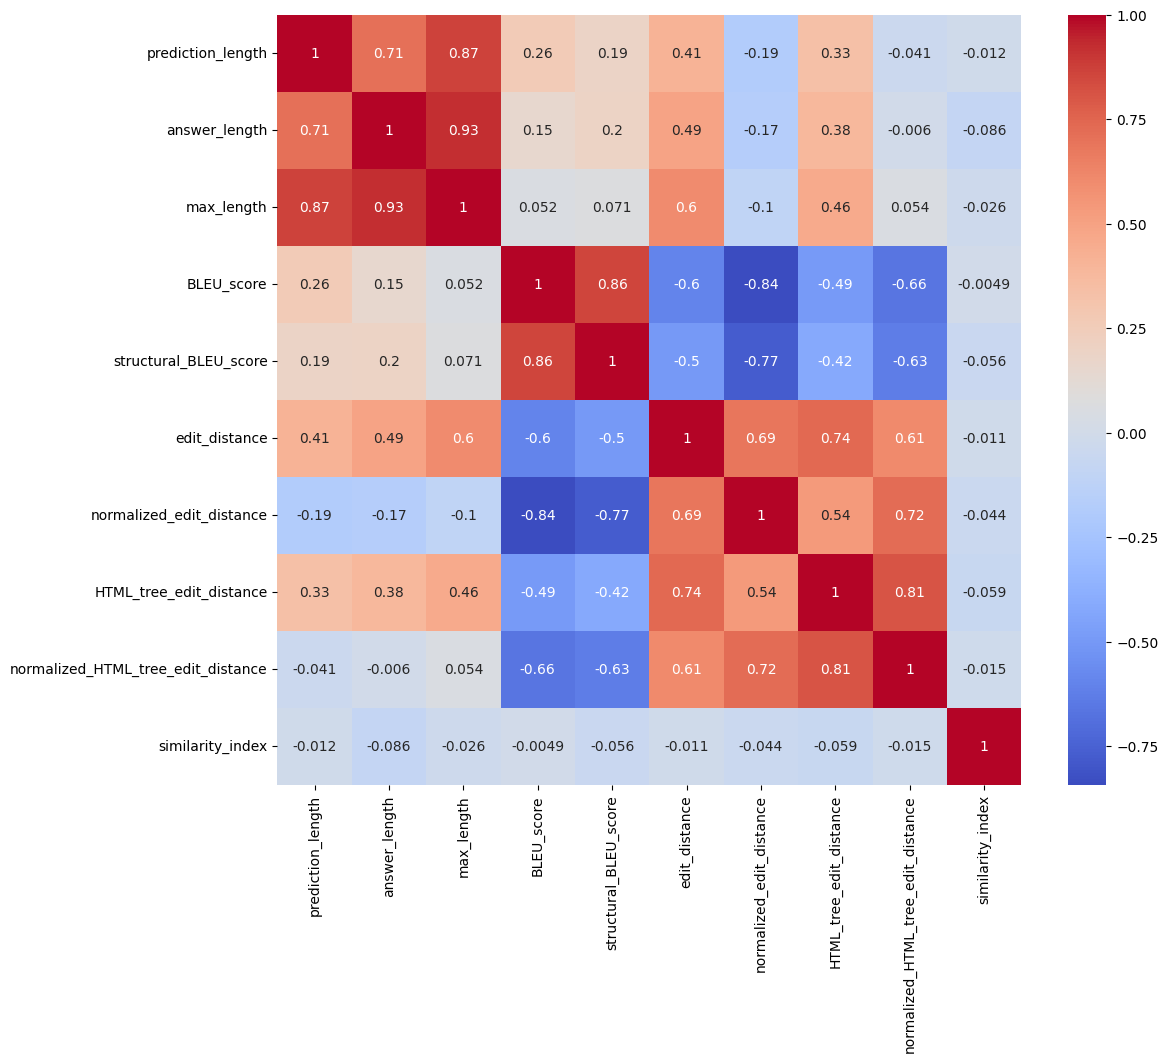

In [10]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

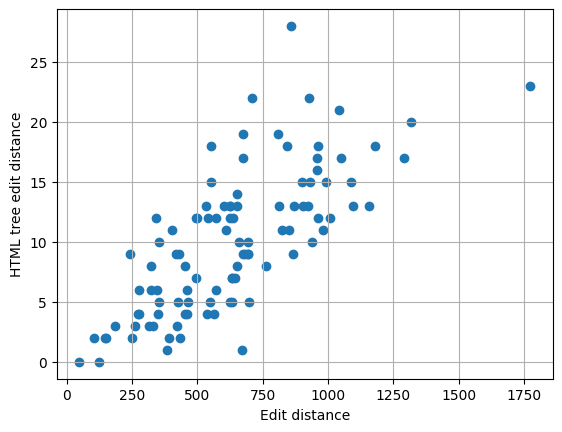

In [11]:
plt.scatter(df["edit_distance"], df["HTML_tree_edit_distance"])
#plt.title("Edit distance vs HTML tree edit distance")
plt.xlabel("Edit distance")
plt.ylabel("HTML tree edit distance")
plt.grid(True)
plt.show()


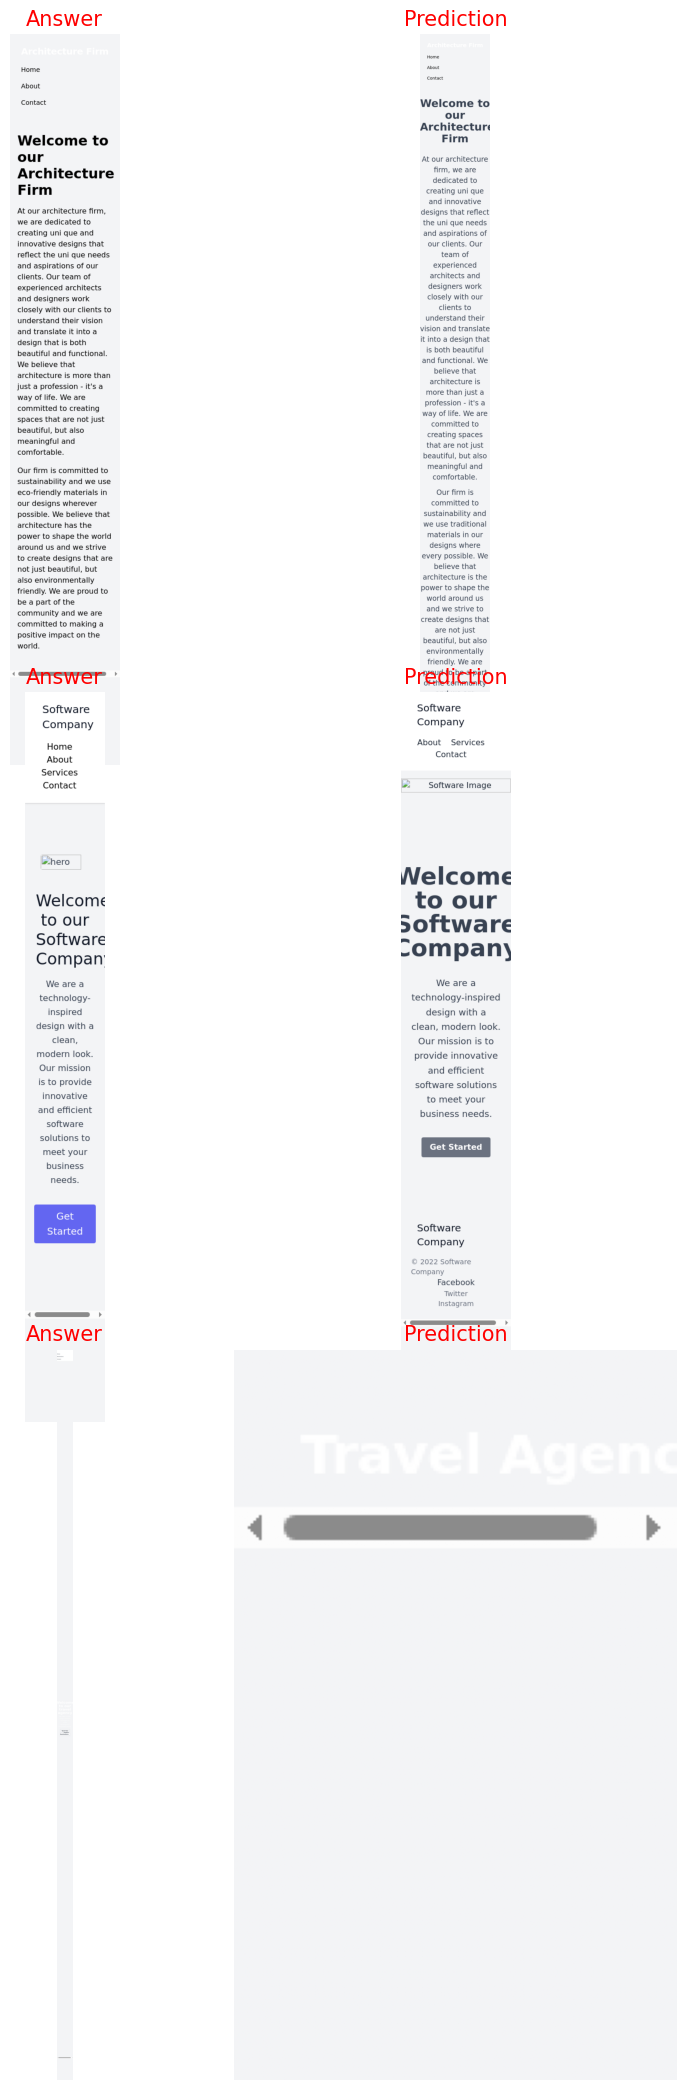

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 3

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(10, NUMBER_DISPLAYED*7))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()
